In [40]:
# Reads the observed time series data and determines peak phasing for specific events
# Data from Morris-Kingston RAS model

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter

pd.read_csv("C:\\Users\\Mikey\\Documents\\Github\\Hysterisis-ML-Modeling\\data\\Henry_4vars_2017_2023.csv")

,datetime,Q,WL,V,WSS,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1/1/2017 0:00,14895.000,440.9718,1.042936,0.000018,NaN,NaN,NaN,NaN
1,1/1/2017 0:15,14898.890,440.9718,1.043208,0.000018,NaN,NaN,NaN,NaN
2,1/1/2017 0:30,14901.010,440.9718,1.043357,0.000018,NaN,NaN,NaN,NaN
3,1/1/2017 0:45,14902.130,440.9718,1.043435,0.000018,NaN,NaN,NaN,NaN
4,1/1/2017 1:00,14902.670,440.9717,1.043480,0.000018,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
236540,9/30/2023 23:00,7365.753,435.2217,0.863339,0.000024,NaN,NaN,NaN,NaN
236541,9/30/2023 23:15,7364.015,435.2222,0.863085,0.000024,NaN,NaN,NaN,NaN
236542,9/30/2023 23:30,7362.207,435.2227,0.862824,0.000024,NaN,NaN,NaN,NaN
236543,9/30/2023 23:45,7359.948,435.2230,0.862529,0.000024,NaN,NaN,NaN,NaN


In [33]:
# Reach .csv, normalize data, and Filter based on specified dates
df = pd.read_csv("C:\\Users\\Mikey\\Documents\\Github\\Hysterisis-ML-Modeling\\data\\Henry_4vars_2017_2023.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
scaler = MinMaxScaler()
df[['WSS', 'V', 'Q', 'WL']] = scaler.fit_transform(df[['WSS', 'V', 'Q', 'WL']])
df_event = df[(df['datetime'] >= '3/29/2022 0:00') & (df['datetime'] <= '4/7/2022 23:45')]
df_event

,datetime,Q,WL,V,WSS,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
183648,2022-03-29 00:00:00,0.157240,0.378665,0.341874,0.350783,NaN,NaN,NaN,NaN
183649,2022-03-29 00:15:00,0.156985,0.378439,0.341462,0.350783,NaN,NaN,NaN,NaN
183650,2022-03-29 00:30:00,0.156722,0.378213,0.341034,0.349196,NaN,NaN,NaN,NaN
183651,2022-03-29 00:45:00,0.156455,0.377988,0.340594,0.349196,NaN,NaN,NaN,NaN
183652,2022-03-29 01:00:00,0.156180,0.377762,0.340136,0.349196,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
184603,2022-04-07 22:45:00,0.270617,0.519764,0.460547,0.439674,NaN,NaN,NaN,NaN
184604,2022-04-07 23:00:00,0.270738,0.519987,0.460589,0.441261,NaN,NaN,NaN,NaN
184605,2022-04-07 23:15:00,0.270855,0.520198,0.460636,0.439674,NaN,NaN,NaN,NaN
184606,2022-04-07 23:30:00,0.270966,0.520404,0.460673,0.441261,NaN,NaN,NaN,NaN


In [35]:
# Calculate the difference between peaks of WSS and WL
peak_wss_index = df_event['WSS'].idxmax()
peak_wl_index = df_event['WL'].idxmax()
time_diff = df_event.loc[peak_wl_index, 'datetime'] - df_event.loc[peak_wss_index, 'datetime']
time_diff

Timedelta('0 days 19:15:00')

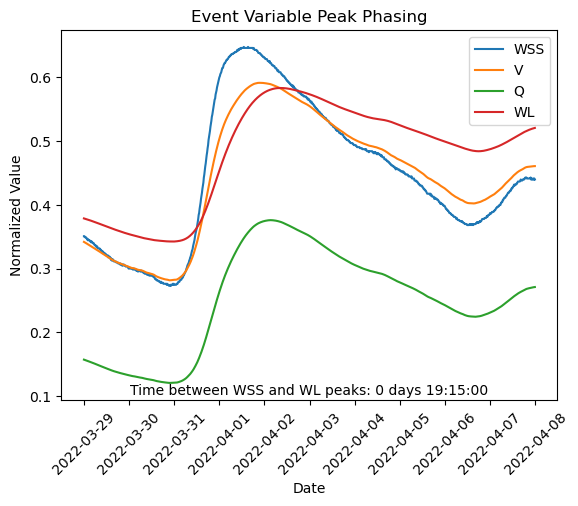

In [44]:
# Plot the flow variable time series
plt.figure()
plt.plot(df_event['datetime'], df_event['WSS'], label = 'WSS')
plt.plot(df_event['datetime'], df_event['V'], label = 'V')
plt.plot(df_event['datetime'], df_event['Q'], label = 'Q')
plt.plot(df_event['datetime'], df_event['WL'], label = 'WL')

plt.title('Event Variable Peak Phasing')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.text(0.5, 0.025, f'Time between WSS and WL peaks: {time_diff}', horizontalalignment = 'center', verticalalignment = 'center', transform=plt.gca().transAxes)

#date_format = DateFormatter("%m-%d")
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.show()

In [ ]:
# If you want to make it a function

def plot_peak_phasing(csv_file, start_date, end_date):
    
    # Read and process .csv file
    df = pd.read_csv(csv_file)
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Filter based on specified dates
    df_event = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

    # Plot the flow variable time series
    plt.figure()
    plt.plot(df_event['datetime'], df_event['WSS'], label = 'WSS')
    plt.plot(df_event['datetime'], df_event['V'], label = 'V')
    plt.plot(df_event['datetime'], df_event['Q'], label = 'Q')
    plt.plot(df_event['datetime'], df_event['WL'], label = 'WL')

